In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns# data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Any results you write to the current directory are saved as output.
import os
for dirname, _, filenames in os.walk(r'C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets\BL-Flickr-Images-Book.csv
C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets\deliveries.csv
C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets\matches.csv


In [49]:
delivery_data=pd.read_csv(r'C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets\deliveries.csv') # Bowl by Bowl data
match_data=pd.read_csv(r'C:\Users\Neeraj\Desktop\PYTHON\DSA programs\Datasets\matches.csv')# IPL(Indian premier League) Match Data from 2008 and 2016.

In [50]:
match_data.shape
match_data.head()
# match_data.loc[match_data.season==2017]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [51]:
# The code identifies the match with the biggest win by runs.
# It extracts details of that match (season, venue, teams, and winner) and stores them in a list.
# It also identifies and filters out all tie matches from the data.
biggest_win=match_data['win_by_runs'].max()
teams_biggest_win=[]
f=match_data.loc[match_data['win_by_runs']==biggest_win]
teams_biggest_win.append((str(f['season'].tolist()[0])))
teams_biggest_win.append((str(f['venue'].tolist()[0])))
teams_biggest_win.append(str(f['team1'].tolist()[0]))
teams_biggest_win.append(str(f['team2'].tolist()[0]))
teams_biggest_win.append(str(f['winner'].tolist()[0]))
tie_matches_no=match_data.loc[match_data['result']=='tie']

In [52]:
f=match_data.loc[match_data['dl_applied']==1]
season_number=f['season'].value_counts()
dl_stadium=f['venue'].value_counts()

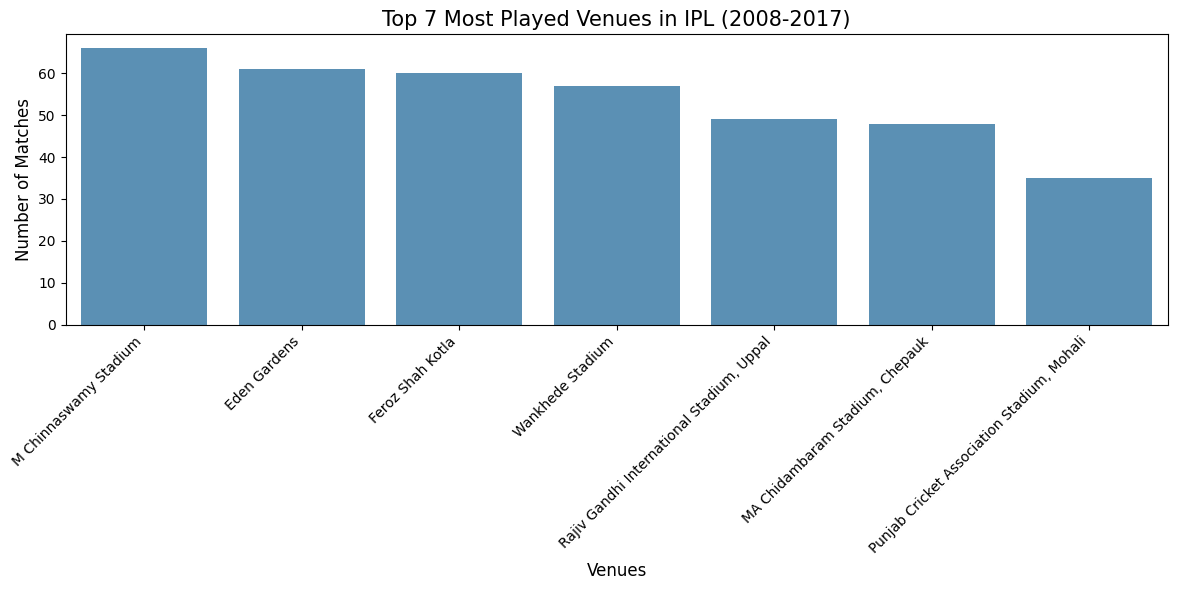

In [53]:
if 'venue' in match_data.columns:
    # Calculate the count of matches played at each venue
    venue_counts = match_data['venue'].value_counts().sort_values(ascending=False)
    # Select top 7 venues
    top_venues = venue_counts.head(7)
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_venues.index, y=top_venues.values, alpha=0.8)
    plt.title('Top 7 Most Played Venues in IPL (2008-2017)', fontsize=15)
    plt.xlabel('Venues', fontsize=12)
    plt.ylabel('Number of Matches', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'venue' column not found in match_data.")

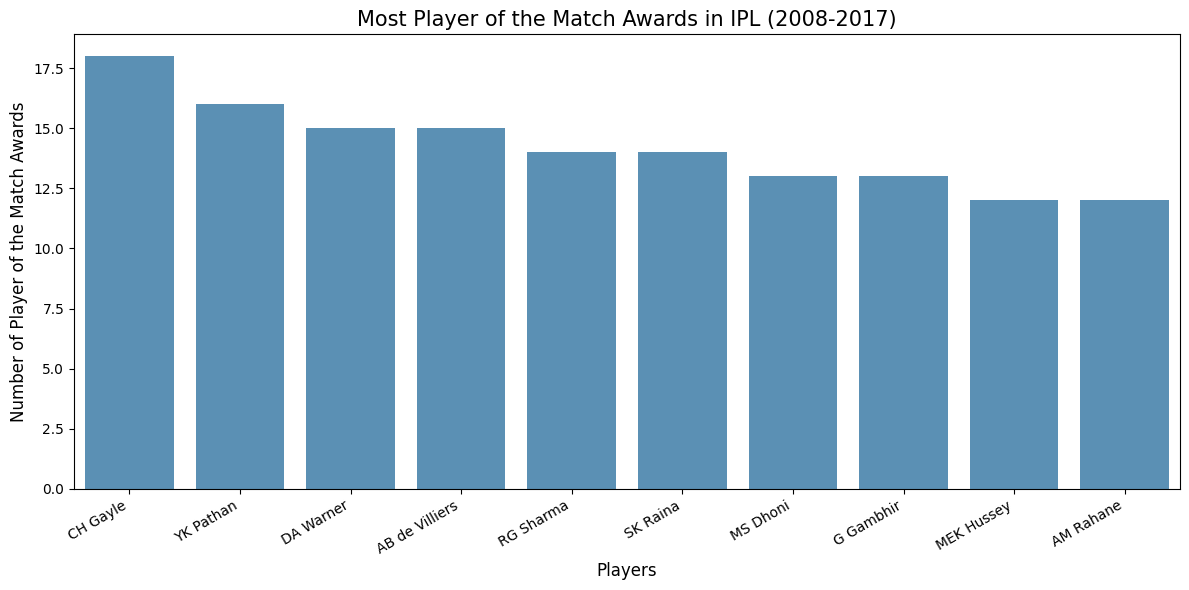

In [54]:
if 'player_of_match' in match_data.columns:
    # Calculate the count of Player of the Match awards per player
    player_counts = match_data['player_of_match'].value_counts().sort_values(ascending=False)
    # Select top players (adjust the number if needed)
    top_players = player_counts.head(10)
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_players.index, y=top_players.values, alpha=0.8)
    plt.title('Most Player of the Match Awards in IPL (2008-2017)', fontsize=15)
    plt.xlabel('Players', fontsize=12)
    plt.ylabel('Number of Player of the Match Awards', fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'player_of_match' column not found in match_data.")

Text(0.5, 0, 'Season')

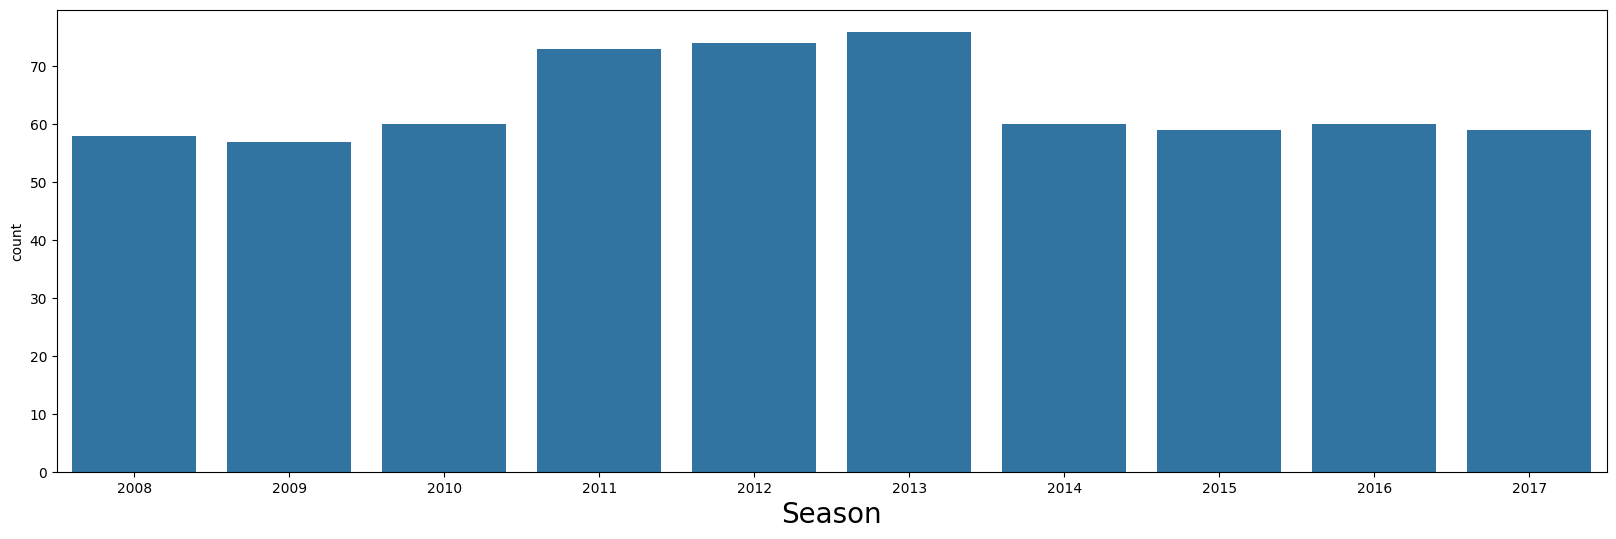

In [55]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

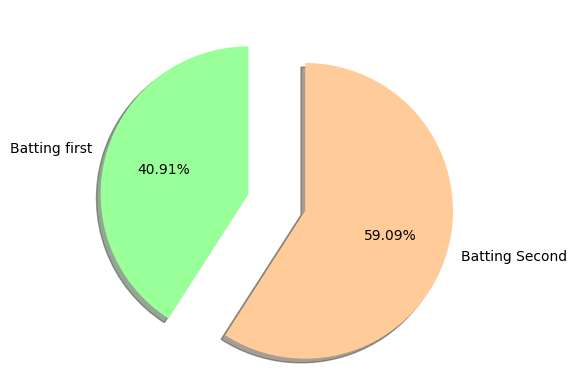

In [56]:
M_Chinnaswamy_Stadium=match_data.loc[(match_data['venue']=='M Chinnaswamy Stadium') ]
M_Chinnaswamy_Stadium_win_by_runs=M_Chinnaswamy_Stadium[M_Chinnaswamy_Stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(M_Chinnaswamy_Stadium_win_by_runs),len(M_Chinnaswamy_Stadium)-len(M_Chinnaswamy_Stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.4),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

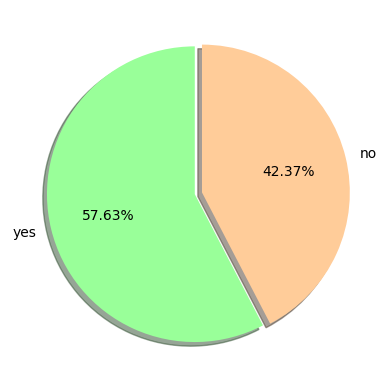

In [57]:
# Analysis for year 2017
match_2017=match_data[match_data['season']==2017]
df=match_2017[match_2017['toss_winner']==match_2017['winner']]
slices=[len(df),(59-len(df))]# because Toal 59 matches were played in 2017
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

# YES,In 2017 if a team won the toss they had slightly better chances to win the match
# Trends in 2017 after winning the toss

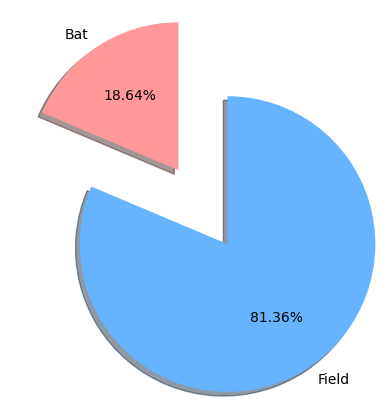

In [58]:
dfs=match_data[(match_data['toss_decision']=='field') & (match_data['season']==2017) ]
labels=['Bat','Field']
slices=[59-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

# Teams winning toss in 2017 majorly decide to Field first.

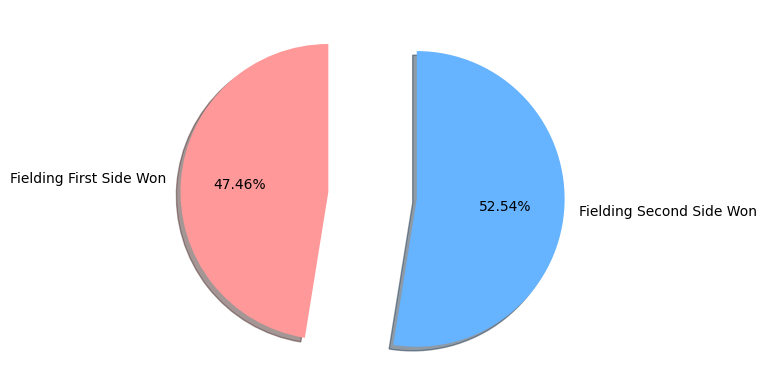

In [59]:
dfd=match_2017[(match_2017['toss_decision']=='field') & (match_2017['toss_winner']==match_2017['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),59-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

In [60]:
# Team1 vs Team 2
def comparator(team1):
    teams=list(match_data.team1.unique())# you can take team2 here also 
    teams.remove(team1)
    opponents=teams.copy()
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]
    for i in opponents:
        mask = (((mt1['team1']==i)|(mt1['team2']==i)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        # each time comparing each opponent team and the team we are looking for
        # print(mask)
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        # to_frame to convert to DataFrame and T is used to Transpose
        print(mt2)

In [61]:
comparator('Mumbai Indians')

winner  Mumbai Indians  Sunrisers Hyderabad
count                5                    5
winner  Mumbai Indians  Gujarat Lions
count                2              2
winner  Rising Pune Supergiant  Mumbai Indians
count                        3               1
winner  Mumbai Indians  Royal Challengers Bangalore
count               13                            8
winner  Mumbai Indians  Kolkata Knight Riders
count               16                      5
winner  Mumbai Indians  Delhi Daredevils
count               11                 9
winner  Mumbai Indians  Kings XI Punjab
count               10               10
winner  Mumbai Indians  Chennai Super Kings
count               12                   10
winner  Mumbai Indians  Rajasthan Royals
count               10                 6
winner  Mumbai Indians  Deccan Chargers
count                6                4
winner  Kochi Tuskers Kerala
count                      1
winner  Mumbai Indians  Pune Warriors
count                5              1


In [62]:
# BALL BY BALL OBSERVATION
print(delivery_data.shape)
print(delivery_data.columns)

(150460, 21)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [63]:
delivery_data.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)